In [6]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


In [7]:
print("Hello")

Hello


In [8]:
import seaborn as sns

In [9]:
# Only get data analyst jobs in the US
df_da_us = df[ (df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualisation
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

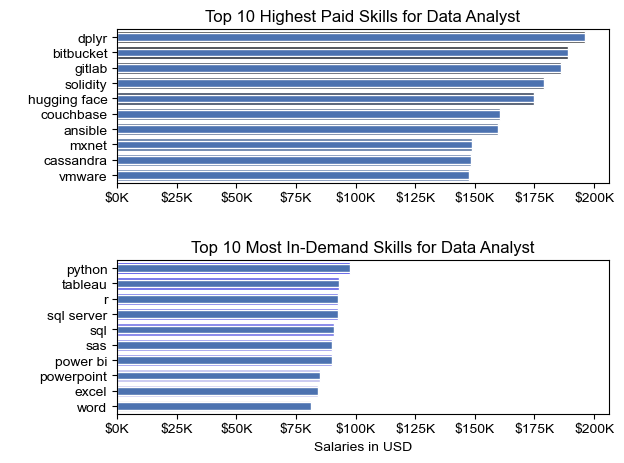

In [10]:
df_da_us = df_da_us.explode('job_skills')

df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by='median',ascending=False).head(10)

df_da_top_pay
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count', ascending = False).head(10).sort_values(by='median',ascending = False)
df_da_skills

fig,ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

# Top 10 Highest Paid Skills for data analyst

sns.barplot(data=df_da_top_pay, x='median' , y=df_da_top_pay.index ,ax=ax[0], hue='median' , palette='dark:b_r')

df_da_top_pay.plot(kind = 'barh' , y='median' , ax= ax[0] , legend= False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_da_skills, x='median' , y=df_da_skills.index ,ax=ax[1], hue='median', palette='light:blue')
df_da_skills.plot(kind='barh', y='median' , ax=ax[1] , legend =False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_xlabel('Salaries in USD')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.legend().remove()

plt.tight_layout()
plt.show()





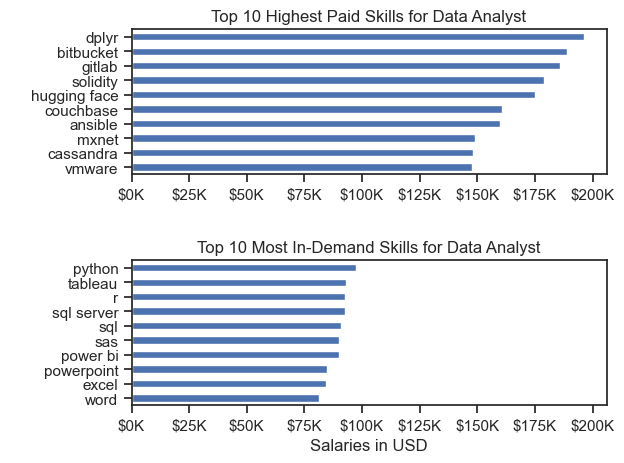

In [11]:
df_da_us = df_da_us.explode('job_skills')

df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by='median',ascending=False).head(10)

df_da_top_pay
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count', ascending = False).head(10).sort_values(by='median',ascending = False)
df_da_skills

fig,ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for data analyst

df_da_top_pay.plot(kind = 'barh' , y='median' , ax= ax[0] , legend= False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_da_skills.plot(kind='barh', y='median' , ax=ax[1] , legend =False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_xlabel('Salaries in USD')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()





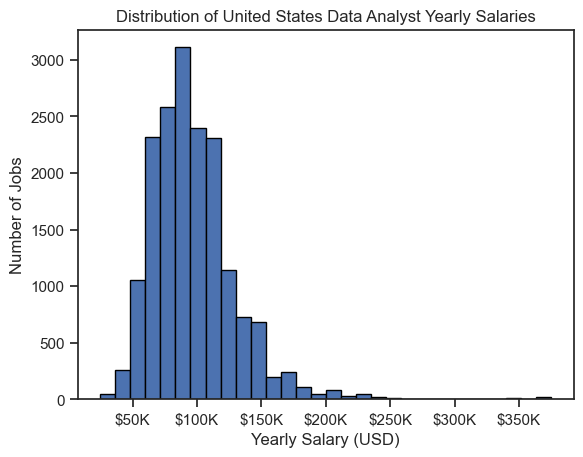

In [12]:
df_da_us['salary_year_avg'].plot(kind ='hist' , bins = 30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')

plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()




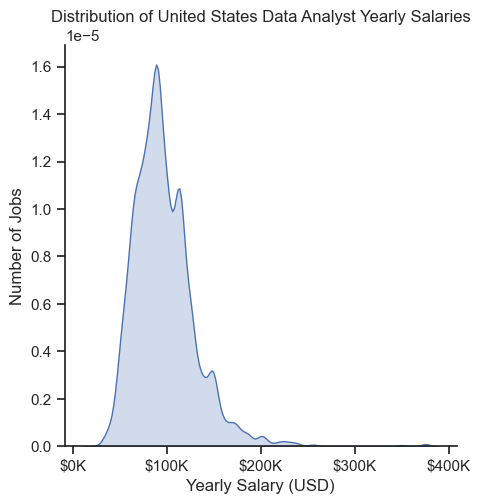

In [13]:
sns.displot(df_da_us['salary_year_avg'], kind = 'kde', fill = True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')

plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [15]:
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


C:\Users\welcome\AppData\Local\Temp\ipykernel_9728\3532344488.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list , labels=job_titles, vert = False)


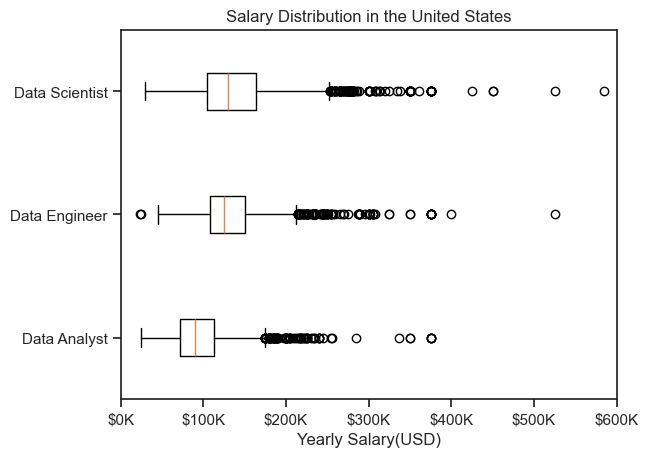

In [62]:
job_titles = ['Data Analyst' , 'Data Engineer' , 'Data Scientist']

# Filter for the job titles and country
df_us = df[ (df['job_title_short'].isin(job_titles) ) & (df['job_country']=='United States' )].dropna(subset=['salary_year_avg']).copy()
job_list = [df_us[df_us['job_title_short']==job_title ]['salary_year_avg']  for job_title in job_titles ].copy()
job_list
#df_us[['job_title_short' , 'salary_year_avg']]

plt.boxplot(job_list , labels=job_titles, vert = False)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary(USD)')
plt.xlim(0 , 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

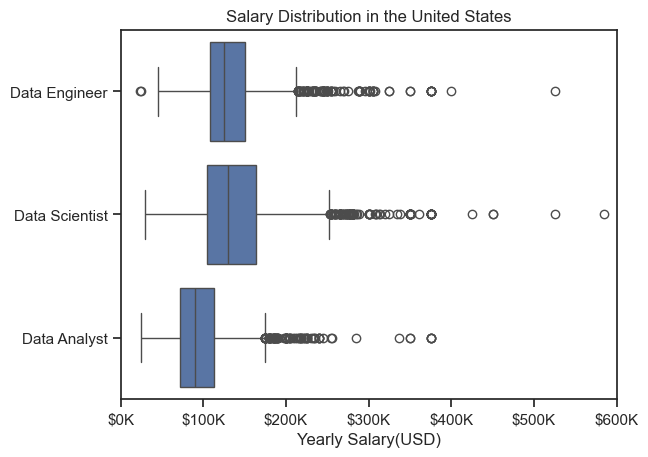

In [72]:
sns.boxplot(data= df_us, x = 'salary_year_avg' , y = 'job_title_short')
#plt.boxplot(job_list , labels=job_titles, vert = False)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary(USD)')
plt.ylabel('')
plt.xlim(0 , 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [66]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')